Fraud Detection Analysis BBG Bank

- This notebook contains an analysis and modeling of fraud detection using various machine learning techniques.
- Summary:

  - Data Loading and Merging: Two datasets, FraudDatasetSubset_1.csv and FraudDatasetSubset_2.csv, are loaded and merged based on the nameOrig column. Missing values are filled with zeros.

  - Data Overview: The merged dataset contains 4,999 rows and 11 columns. Key columns include nameOrig, step, type, amount, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, and isFlaggedFraud.

  - Data Analysis: Various analyses are performed, including descriptive statistics, unique value counts, and visualizations like bar charts for transaction types and fraud occurrences.

  - Fraud Analysis: Focus on TRANSFER and CASH_OUT transactions, calculating the percentage of fraudulent transactions for these types and visualizing the results with a pie chart.hart.

In [51]:
import pandas as pd  # Importing the pandas library for data manipulation and analysis
import numpy as np  # Importing the numpy library for numerical operations
import seaborn as sns  # Importing the seaborn library for data visualization
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression model from scikit-learn
from sklearn.tree import DecisionTreeClassifier  # Importing Decision Tree Classifier from scikit-learn
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting
from imblearn.over_sampling import SMOTE  # Importing SMOTE for handling imbalanced datasets
from imblearn.under_sampling import RandomUnderSampler  # Importing RandomUnderSampler for handling imbalanced datasets
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature scaling

# (BBG Bank) dataset La Banca Central Bank

# Upload data from CSV files
fraud_1_df = pd.read_csv(r"C:\Users\brand\OneDrive - SNHU\Module 7 Project 3\FraudDatasetSubset_1.csv")
fraud_2_df = pd.read_csv(r"C:\Users\brand\OneDrive - SNHU\Module 7 Project 3\FraudDatasetSubset_2.csv")

# Merge the two datasets on the 'nameOrig' column
fraud_merged = fraud_1_df.merge(fraud_2_df, left_on='nameOrig', right_on='nameOrig')

# Fill all missing values with 0s
fraud_merged.fillna(0, inplace=True)

# Print the original and merged dataset sizes
print(f'Original sizes: fraud_1_df={fraud_1_df.shape}, fraud_2_df={fraud_2_df.shape}; Merged size: fraud_merged={fraud_merged.shape}')

# Display the first 5 rows of the original datasets
fraud_1_df.head()
fraud_2_df.head()

# Print the first 10 rows of the merged dataset
fraud_merged.head(10)

Original sizes: fraud_1_df=(4999, 9), fraud_2_df=(4999, 3); Merged size: fraud_merged=(4999, 11)


,nameOrig,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,C1231006815,1,PAYMENT,9839.64,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,C1666544295,1,PAYMENT,1864.28,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,C1305486145,1,TRANSFER,181.00,181.00,0.00,C553264065,0.0,0.00,1,0
3,C840083671,1,CASH_OUT,181.00,181.00,0.00,C38997010,21182.0,0.00,1,0
4,C2048537720,1,PAYMENT,11668.14,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,C90045638,1,PAYMENT,7817.71,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,C154988899,1,PAYMENT,7107.77,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,C1912850431,1,PAYMENT,7861.64,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,C1265012928,1,PAYMENT,4024.36,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,C712410124,1,DEBIT,5337.77,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [16]:
fraud_1_df.head()

,nameOrig,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,C1231006815,1,PAYMENT,9839.64,170136.0,160296.36,M1979787155,0.0,0.0
1,C1666544295,1,PAYMENT,1864.28,21249.0,19384.72,M2044282225,0.0,0.0
2,C1305486145,1,TRANSFER,181.00,181.0,0.00,C553264065,0.0,0.0
3,C840083671,1,CASH_OUT,181.00,181.0,0.00,C38997010,21182.0,0.0
4,C2048537720,1,PAYMENT,11668.14,41554.0,29885.86,M1230701703,0.0,0.0


In [18]:
fraud_2_df.head()

,nameOrig,isFraud,isFlaggedFraud
0,C1231006815,0,0
1,C1666544295,0,0
2,C1305486145,1,0
3,C840083671,1,0
4,C2048537720,0,0


In [27]:
# Created new CSV of merged files
fraud_merged.to_csv('C:/Users/brand/OneDrive - SNHU/Module 7 Project 3/merged_fraud_dataset.csv', index=False)

# loaded new merged_fraud_dataset
fraud_merged_df = pd.read_csv('C:/Users/brand/OneDrive - SNHU/Module 7 Project 3/merged_fraud_dataset.csv')

# Assign the merged DataFrame to df and display the first few rows
df = fraud_merged_df
df.head()

,nameOrig,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,C1231006815,1,PAYMENT,9839.64,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,C1666544295,1,PAYMENT,1864.28,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,C1305486145,1,TRANSFER,181.00,181.0,0.00,C553264065,0.0,0.0,1,0
3,C840083671,1,CASH_OUT,181.00,181.0,0.00,C38997010,21182.0,0.0,1,0
4,C2048537720,1,PAYMENT,11668.14,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [24]:
# Generate descriptive statistics for the DataFrame and round the results to 2 decimal places
df.describe().round(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.0
mean,1.89,101527.76,1041750.57,1063559.10,918403.68,1065524.26,0.01,0.0
std,1.18,300991.57,2301463.46,2343265.56,2542430.09,2924090.59,0.09,0.0
min,1.00,6.42,0.00,0.00,0.00,0.00,0.00,0.0
25%,1.00,3734.68,570.50,0.00,0.00,0.00,0.00,0.0
50%,1.00,10951.21,26512.93,18136.20,0.00,0.00,0.00,0.0
75%,3.00,108608.39,293185.99,299000.38,364156.24,270110.78,0.00,0.0
max,5.00,10000000.00,12900000.00,13000000.00,19500000.00,19200000.00,1.00,0.0


In [258]:
# validated no null values
df.isnull().sum()

nameOrig          0
step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [260]:
# validated no duplicates
df.duplicated().sum()

0

In [262]:
df['step'].unique() 

array([1, 2, 3, 4, 5], dtype=int64)

In [264]:
df['type'].unique() 

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [266]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [268]:
df.sample(8) # randomly selects rows of data (in this case 8) and displays them

,nameOrig,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3239,C1130656047,2,PAYMENT,4865.12,5939.00,1073.88,M461001437,0.00,0.00,0,0
384,C1539947037,1,TRANSFER,179253.24,0.00,0.00,C1870252780,179614.10,46462.23,0,0
3804,C1482087396,3,CASH_OUT,13881.42,0.00,0.00,C728885526,138627.65,152509.08,0,0
1071,C108982313,1,DEBIT,6606.47,1862.00,0.00,C1870252780,18868.96,46462.23,0,0
3100,C737897289,2,DEBIT,1654.94,146980.00,145325.06,C77811359,11147.00,12801.94,0,0
1480,C558404860,1,DEBIT,3269.57,57324.00,54054.43,C767904468,20445.00,0.00,0,0
3505,C1304939804,2,PAYMENT,1338.19,639366.21,638028.02,M1353406178,0.00,0.00,0,0
1062,C948960194,1,PAYMENT,663.34,1347260.94,1346597.60,M173060252,0.00,0.00,0,0


Please take note of the following irregularities in the data:
- When cash is transferred from the origin to the destination, the newbalanceDest sometimes fails to reflect that change, which could indicate possible fraud.
- When cash is transferred from the origin to the destination, the required amount is not reflected in oldbalanceOrg, which could also indicate possible fraud.
- The values in nameOrig sometimes consist of 9 digits instead of 10.
- Single transactions of 200000 and above should be marked as 1 in the isFlaggedFraud column, but manyt of times they are not.

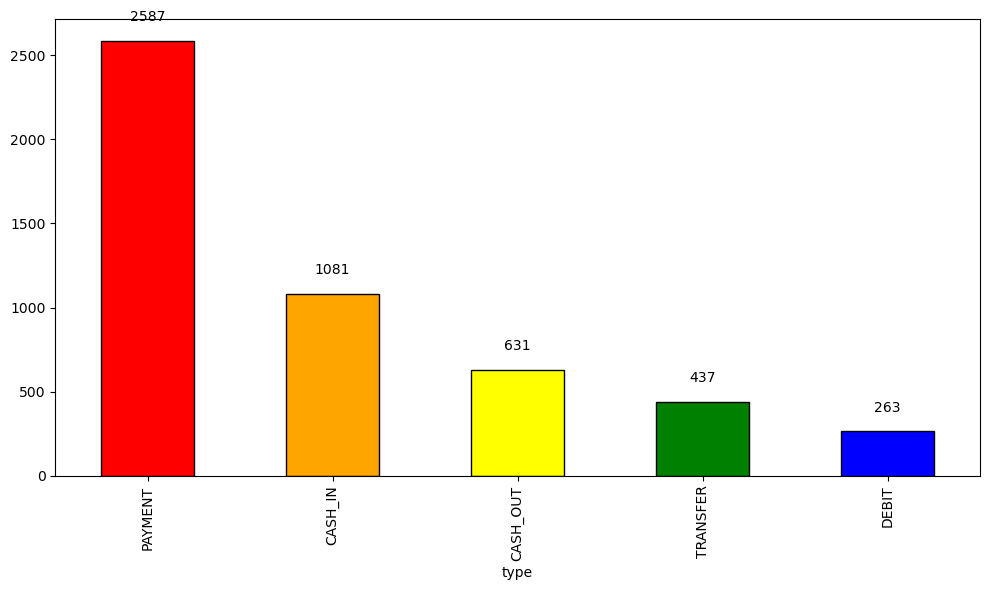

In [271]:
# Barchart for transaction type
plt.figure(figsize=(10, 6))
typetransiction = df['type'].value_counts()

# Add text labels above the bars
for i, count in enumerate(typetransiction):
    plt.text(i, count + 100, str(count), ha='center', va='bottom', fontsize=10)

# Plot the bar chart with specified colors
colors = ['red', 'orange', 'yellow', 'green', 'blue']
typetransiction.plot(kind='bar', edgecolor='black', color=colors)

plt.tight_layout()
plt.show()

The bar chart shows the count of different types of transactions:
- PAYMENT: The highest count with 2587 transactions.
- CASH_IN: 1081 transactions.
- CASH_OUT: 631 transactions.
- TRANSFER: 437 transactions.
- DEBIT: The lowest count with 263 transactions.

This visualization provides insight into the frequency of each transaction type in your dataset.ataset. 

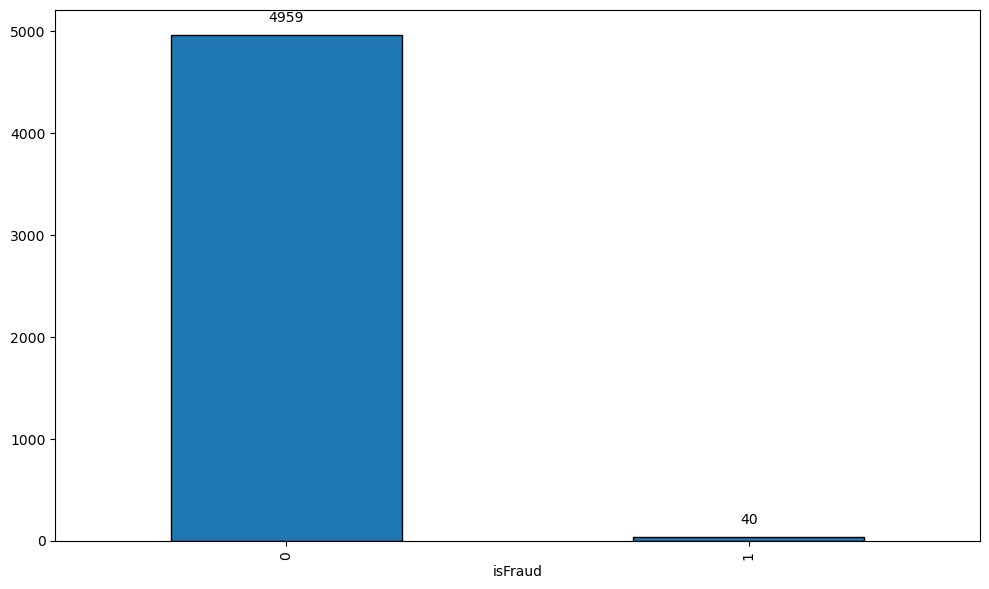

In [273]:
# barchart of is fraud
plt.figure(figsize=(10, 6))
isfraud = df['isFraud'].value_counts()
for i, count in enumerate(isfraud):
    plt.text(i, count + 100, str(count), ha='center', va='bottom', fontsize=10)
    
isfraud.plot(kind='bar', edgecolor='black')
plt.tight_layout()
plt.show()

The bar chart displays the number of transactions categorized as fraudulent (isFraud):
- Non-Fraudulent Transactions (0): 4959 transactions.
- Fraudulent Transactions (1): 40 transactions.
s.

This reveals a notable imbalance between non-fraudulent and fraudulent transactions in your dataset, a common occurrence in fraud detection scenarios. Implementing balancing techniques such as SMOTE can help mitigate this issue and enhance model performnce.ance. 

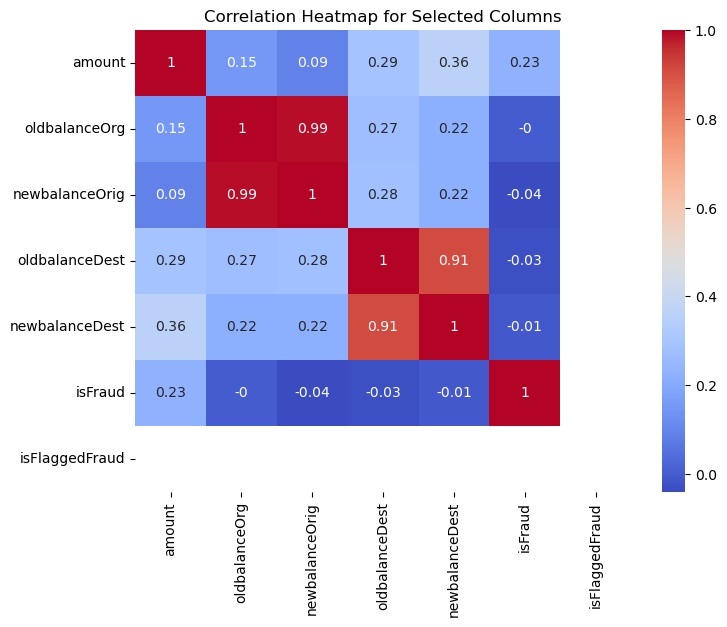

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the specified columns, excluding 'type'
selected_columns = df[['amount','oldbalanceOrg','newbalanceOrig',  'oldbalanceDest','newbalanceDest', 'isFraud','isFlaggedFraud']]

# Creating the correlation matrix
correlation_matrix = selected_columns.corr().round(2)

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Adding a title to the plot
plt.title('Correlation Heatmap for Selected Columns')

# Display the plot
plt.show()


Amount and isFraud: There is a moderate positive correlation, indicating that higher transaction amounts are somewhat associated with fraudulent transactions.

Amount and isFlaggedFraud: There is a weak positive correlation, suggesting that flagged transactions are slightly related to higher amounts
.
isFraud and isFlaggedFraud: There is a very weak positive correlation, showing that flagged transactions are rarely fraudulent.

In [41]:
simple_data=df[(df['type']=='TRANSFER') | (df['type']=='CASH_OUT')]

In [279]:
simple_data.head(10)

,nameOrig,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,C1305486145,1,TRANSFER,181.00,181.00,0.0,C553264065,0.0,0.00,1,0
3,C840083671,1,CASH_OUT,181.00,181.00,0.0,C38997010,21182.0,0.00,1,0
15,C905080434,1,CASH_OUT,229133.94,15325.00,0.0,C476402209,5083.0,51513.44,0,0
19,C1670993182,1,TRANSFER,215310.30,705.00,0.0,C1100439041,22425.0,0.00,0,0
24,C1984094095,1,TRANSFER,311685.89,10835.00,0.0,C932583850,6267.0,2719172.89,0,0
42,C768216420,1,CASH_OUT,110414.71,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
47,C1570470538,1,CASH_OUT,56953.90,1942.02,0.0,C824009085,70253.0,64106.18,0,0
48,C512549200,1,CASH_OUT,5346.89,0.00,0.0,C248609774,652637.0,6453430.91,0,0
51,C2072313080,1,CASH_OUT,23261.30,20411.53,0.0,C2001112025,25742.0,0.00,0,0
58,C1976401987,1,TRANSFER,62610.80,79114.00,16503.2,C1937962514,517.0,8383.29,0,0


In [281]:
# Count the total number of transactions for each type and assign the result to total_transactions_by_type
total_transactions_by_type = simple_data['type'].value_counts()

# Count the number of fraudulent transactions for each type and assign the result to fraud_transactions_by_type
fraud_transactions_by_type = simple_data[simple_data['isFraud'] == 1]['type'].value_counts()

# Calculate the percentage of fraudulent transactions for each type
fraud_percentage_by_type = (fraud_transactions_by_type / total_transactions_by_type) * 100

# Reorder the index to ensure 'CASH_OUT' and 'TRANSFER' are included, filling missing values with 0
fraud_percentage_by_type = fraud_percentage_by_type.reindex(['CASH_OUT', 'TRANSFER'], fill_value=0)

# Print the percentage of fraudulent transactions for each type
print(fraud_percentage_by_type)


type
CASH_OUT    3.328051
TRANSFER    4.347826
Name: count, dtype: float64


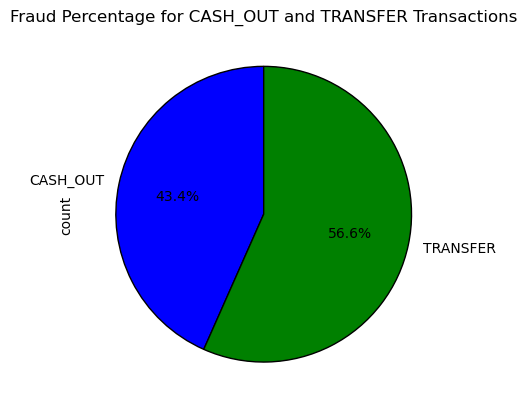

In [283]:
# Plot the pie chart fraud % CASH_OUT & TRANSFER
fraud_percentage_by_type.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['blue', 'green'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Fraud Percentage for CASH_OUT and TRANSFER Transactions')
plt.show()

CASH_OUT transactions represent 56.6% of fraudulent activities, while TRANSFER transactions account for 43.4% of fraudulent transactions. This shows a higher percentage of fraudulent activities associated with CASH_OUT compared to TRANSFER.  

In [285]:
# simple_data copy to drop nameOrig and nameDest
simple_data = simple_data.copy()
simple_data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [301]:
# Replace 'TRANSFER' with 0 and 'CASH_OUT' with 1
simple_data = simple_data.replace({'TRANSFER': 0, 'CASH_OUT': 1})

# Apply infer_objects to retain the old behavior
simple_data = simple_data.infer_objects(copy=False)

In [303]:
simple_data.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,0,181.00,181.00,0.0,0.0,0.00,1,0
3,1,1,181.00,181.00,0.0,21182.0,0.00,1,0
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0,0
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0,0
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0,0
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0,0
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0,0
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0,0
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0,0
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0,0


In [305]:
# Drop the 'isFraud' column from simple_data and assign the result to X
X = simple_data.drop(columns='isFraud')

# Assign the 'isFraud' column from simple_data to y
y = simple_data['isFraud']

# Initialize the SMOTE (Synthetic Minority Over-sampling Technique) object with a random state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to resample the features (X) and target (y) to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Concatenate the resampled features and target into a single DataFrame
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)


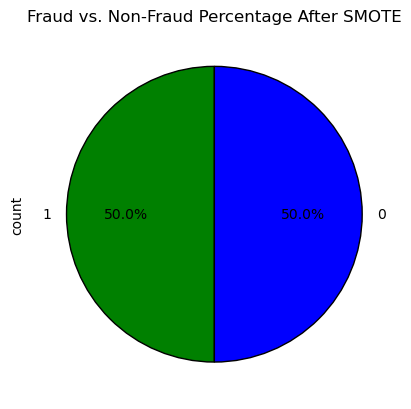

In [307]:
# Count the occurrences of each class in the resampled target variable
fraud_counts = y_resampled.value_counts()

# Plot the class distribution as a pie chart
fraud_counts.plot(
    kind='pie',                # Specify the type of plot as a pie chart
    autopct='%1.1f%%',         # Display the percentage of each slice with one decimal place
    colors=['green', 'blue'],  # Set the colors for the slices
    startangle=90,             # Start the pie chart at 90 degrees
    wedgeprops={'edgecolor': 'black'} # the edging color
)

# Set the title of the pie chart
plt.title('Fraud vs. Non-Fraud Percentage After SMOTE')

# Display the pie chart
plt.show()


The pie chart labeled "Fraud vs. Non-Fraud Percentage After SMOTE" indicates the following:

- Fraudulent Transactions: 50.0%
- Non-Fraudulent Transactions: 50.0%

This shows that after using the Synthetic Minority Over-sampling Technique (SMOTE), the dataset has been balanced to contain an equal number of fraudulent and non-fraudulent transactions. This balance is essential for training machine learning models to more effectively detect fraud.ely.. 

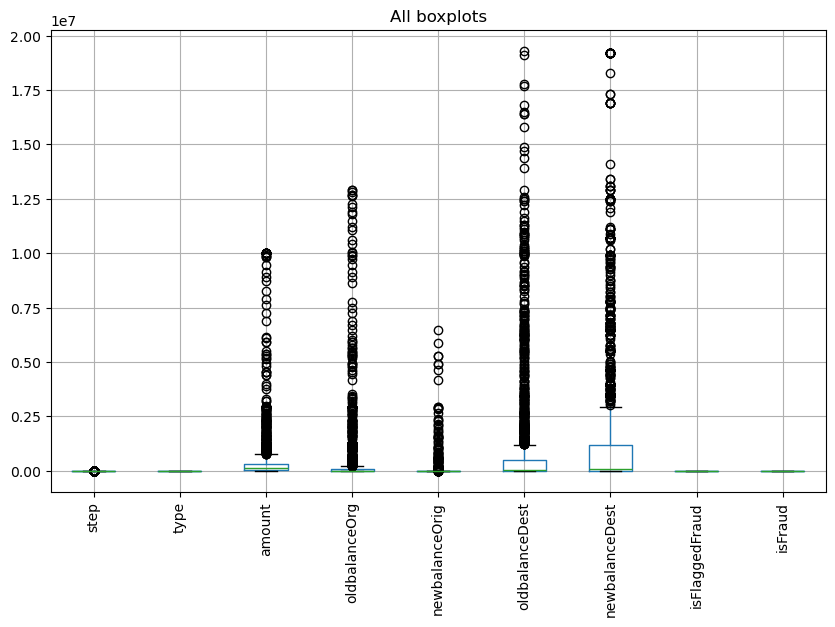

In [309]:
#Boxplot
# Set the figure size to 10 inches by 6 inches
plt.figure(figsize=(10,6)) 
# Create a boxplot for the balanced_data DataFrame
balanced_data.boxplot()
# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
# Add a title to the plot
plt.title('All boxplots')
                 
# Display the plot
plt.show()   

The boxplots show the distribution of various features in the data:
- Step: Distribution of transaction steps.
- Type: Distribution of transaction types.
- Amount: Distribution of transaction amounts covering a wide range of values.
- OldbalanceOrg: Distribution of the original balance before the transaction.
- NewbalanceOrig: Distribution of the new balance after the transaction.
- OldbalanceDest: Distribution of the original balance of the destination account.
- NewbalanceDest: Distribution of the new balance of the destination account.
- IsFraud: Dud: The distribution of fraudulent tran
ss.
These boxplots help identify outliers and understand the spread of data across differentfeatures. 

In [311]:
# Import the StandardScaler class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object
std_scaler = StandardScaler()

# Apply the StandardScaler to the features (excluding 'isFraud') and create a new DataFrame with the scaled data
data_scaled = pd.DataFrame(std_scaler.fit_transform(balanced_data.loc[:, ~balanced_data.columns.isin(['isFraud'])]))

# Set the column names of the scaled DataFrame to match the original feature names (excluding 'isFraud')
data_scaled.columns = balanced_data.columns[~balanced_data.columns.isin(['isFraud'])]

# Add the 'isFraud' column back to the scaled DataFrame
data_scaled['isFraud'] = balanced_data['isFraud'].values

In [313]:
data_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,-0.768512,-0.908808,-0.387508,-0.286666,-0.146895,-0.386046,-0.460199,0.0,1
1,-0.768512,1.100342,-0.387508,-0.286666,-0.146895,-0.377217,-0.460199,0.0,1
2,-0.768512,1.100342,-0.202174,-0.276115,-0.146895,-0.383927,-0.444307,0.0,0
3,-0.768512,-0.908808,-0.213364,-0.286301,-0.146895,-0.376699,-0.460199,0.0,0
4,-0.768512,-0.908808,-0.135349,-0.279243,-0.146895,-0.383434,0.378683,0.0,0


In [315]:
# Drop the 'isFraud' column from data_scaled and assign the result to X (features)
X = data_scaled.drop(['isFraud'], axis=1)

# Assign the 'isFraud' column from data_scaled to y (target)
y = data_scaled['isFraud']

# Split the data into training and testing sets with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model_lr = LogisticRegression()

# Initialize the Decision Tree Classifier model
model_dt = DecisionTreeClassifier()

# Fit the Logistic Regression model on the training data
model_lr.fit(X_train, y_train)

LogisticRegression()

In [319]:
# Fit the Decision Tree Classifier model on the training data
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [317]:
# Import the necessary metrics from sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict the target values for the test set using the Logistic Regression model
y_pred = model_lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Print the accuracy of the model
print(f"accuracy: {accuracy}")

# Print the confusion matrix
print(f"conf_matrix: \n{conf_matrix}")

# Print the classification report
print(f"class_report: \n{class_report}")


accuracy: 0.8810679611650486
conf_matrix: 
[[182  36]
 [ 13 181]]
class_report: 
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       218
           1       0.83      0.93      0.88       194

    accuracy                           0.88       412
   macro avg       0.88      0.88      0.88       412
weighted avg       0.89      0.88      0.88       412



Performance metrics of the classification model are as follows:

Accuracy: 0.8811
Confusion Matrix:
  - True Negatives: 182
  - False Positives: 36
  - False Negatives: 13
  - True Positives: 181

Classification Report:
  - Class 0:
    - Precision: 0.93
    - Recall: 0.83
    - F1-Score: 0.88
    - Support: 218
  - Class 1:
    - Precision: 0.83
    - Recall: 0.93
    - F1-Score: 0.88
    - Support: 194
Macro Average:
  - Precision: 0.88
  - Recall: 0.88
  - F1-Score: 0.88
  - Support: 412
Weighted Average:
  - Precision: 0.89
  - Recall: 0.88
  - F1-Score: 0.88
  - Support: 412

Metrics demonstrate that the model performs well, with balanced precision and recall for both classes.

In [321]:
# Predict the target values for the test set using the Decision Tree Classifier model
y_pred = model_dt.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Print the accuracy of the model
print(f"accuracy: {accuracy}")

# Print the confusion matrix
print(f"conf_matrix: \n{conf_matrix}")

# Print the classification report
print(f"class_report: \n{class_report}")


accuracy: 0.9830097087378641
conf_matrix: 
[[212   6]
 [  1 193]]
class_report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       218
           1       0.97      0.99      0.98       194

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



Performance Metrics:
 Accuracy: 0.881
1- Confusion Matrix:
  - True Negatives: 182
  - False Positives: 36
  - False Negatives: 13
  - True Positive
s181
- Classification Rt:
  - Class 0:
    - Precision: 0.93
    - Recall: 0.83
    - F1-Score: 0.88
    - Srt: 218
  - Class 1:
    - Precision: 0.83
    - Recall: 0.93
    - F1-Score: 0.88
  - Support: 194
- Macro Average:
  - Precision: 0.88
  - Recall: 0.88
  - F1-Score: 08
  - Support: 412
- Weighted Average:
  - Precision: 0.89
  - Recall: 0.88
  - F1-ScorM
  - Support: 412

These metrics indicate that the model performs well, demonstrating balanced precision and recall for both classes.both classes.

In [48]:
# Print a list of user-defined variables in the current environment for documentation
variables = [var for var in globals() if not var.startswith('_') and not callable(globals()[var])]
print("List of variables:", variables)

List of variables: ['In', 'Out', 'json', 'getpass', 'hashlib', 'pd', 'np', 'sns', 'plt', 'fraud_1_df', 'fraud_2_df', 'fraud_merged', 'fraud_merged_df', 'df', 'simple_data']


In [323]:
# Import the RandomForestClassifier class from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
model_rf = RandomForestClassifier()

# Fit the Random Forest Classifier model on the training data
model_rf.fit(X_train, y_train)

# Predict the target values for the test set using the Random Forest Classifier model
y_pred = model_rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Print the accuracy of the model
print(f"accuracy: {accuracy}")

# Print the confusion matrix
print(f"conf_matrix: \n{conf_matrix}")

# Print the classification report
print(f"class_report: \n{class_report}")


accuracy: 0.9927184466019418
conf_matrix: 
[[215   3]
 [  0 194]]
class_report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       218
           1       0.98      1.00      0.99       194

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



The performance metrics of the classification model are as follows:
- Accuracy: 0.99
2
- Confusion Matrix:
  - True Negatives: 215
  - False Positives: 3
  - False Negatives: 0
  - True Positiv
    e 194
- Classification Report:
  - Class 0: Precision: 1.00, Recall: 0.99, F1-Score: 0.99, Support: 218
  - Class 1: Precision: 0.98, Recall: 1.00, F1-Score: 0.99, Suprt: 194
- Macro Average: Precision: 0.99, Recall: 0.99, F1-Score: 0.99, Suort: 412
- Weighted Average: Precision: 0.99, Recall: 0.99, F1-Score: 0.99, SuM412

These metrics demonstrate excellent model performance with high precision and recall for both classes.
both classes.

In [328]:
import xml.etree.ElementTree as ET

# Create the root element
root = ET.Element("NotebookSummary")

# Add child elements
data_loading = ET.SubElement(root, "Section", name="Data Loading and Merging")
data_loading.text = "Two datasets, FraudDatasetSubset_1.csv and FraudDatasetSubset_2.csv, are loaded and merged based on the nameOrig column. Missing values are filled with zeros."

data_overview = ET.SubElement(root, "Section", name="Data Overview")
data_overview.text = "The merged dataset contains 4,999 rows and 11 columns. Key columns include nameOrig, step, type, amount, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, and isFlaggedFraud."

data_analysis = ET.SubElement(root, "Section", name="Data Analysis")
data_analysis.text = "Various analyses are performed, including descriptive statistics, unique value counts, and visualizations like bar charts for transaction types and fraud occurrences."

fraud_analysis = ET.SubElement(root, "Section", name="Fraud Analysis")
fraud_analysis.text = "Focus on TRANSFER and CASH_OUT transactions, calculating the percentage of fraudulent transactions for these types and visualizing the results with a pie chart."

# Create the XML tree and write it to a file
tree = ET.ElementTree(root)
tree.write("notebook_summary.xml")

print("Summary saved as notebook_summary.xml")


Summary saved as notebook_summary.xml
